<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/Testing_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Networks can replicate any function!!

In [481]:
from torch import nn
import torch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD

In [482]:
X = np.linspace(1,100,num=200)
y = 0.7*X + 0.3
#X  , y

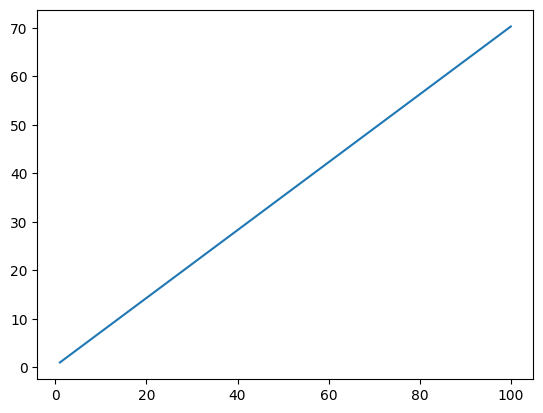

In [484]:
fig,ax=plt.subplots()
ax.plot(X,y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42,shuffle=False)
#fig,ax=plt.subplots()

In [485]:
class Model_comp(nn.Module):
  def __init__(self):
    super().__init__()
    self.ll1 = nn.Linear(in_features=1,out_features=8)
    self.ac1 = nn.ReLU()
    self.ll2 = nn.Linear(in_features=8,out_features=16)
    self.ac2 = nn.ReLU()
    self.ll3 = nn.Linear(in_features=16,out_features=16)
    self.ac3 = nn.ReLU()
    self.ll4 = nn.Linear(in_features=16,out_features=4)
    self.ac4 = nn.ReLU()
    self.output = nn.Linear(in_features=4,out_features=1)

  def forward(self,X):
    X = self.ll1(X)
    X = self.ac1(X)
    X = self.ll2(X)
    X = self.ac2(X)
    X = self.ll3(X)
    X = self.ac3(X)
    X = self.ll4(X)
    X = self.ac4(X)
    X = self.output(X)
    return(X)


In [486]:
class ModelSimple(nn.Module):
  def __init__(self):
    super().__init__()
    self.ll1 = nn.Linear(1,1)

  def forward(self,X):
    X = self.ll1(X)
    return(X)

In [487]:
from torch import nn
class LinearRegressionModel(nn.Module): #<-- evrything in pytorch uses nn.module as a key building block
  def __init__(self):
    super().__init__()
    self.weights =nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self,X):
    return self.weights * X + self.bias

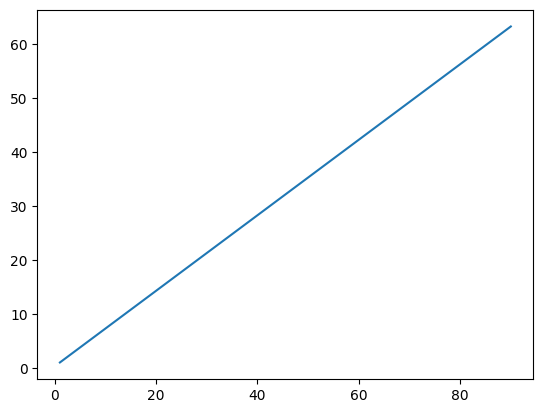

In [488]:
fig,ax=plt.subplots()
ax.plot(X_train,y_train)

In [489]:
X_train = torch.from_numpy(X_train).type(torch.float32).unsqueeze(dim=1)
y_train = torch.from_numpy(y_train).type(torch.float32).unsqueeze(dim=1)
X_test = torch.from_numpy(X_test).type(torch.float32).unsqueeze(dim=1)
y_test = torch.from_numpy(y_test).type(torch.float32).unsqueeze(dim=1)

In [490]:
# Create a seed
#torch.manual_seed(42)
model = ModelSimple()
model.state_dict()

OrderedDict([('ll1.weight', tensor([[-0.4607]])),
             ('ll1.bias', tensor([-0.1173]))])

In [491]:
with torch.inference_mode():
  y_pred1 = model(X_test)

In [492]:
import matplotlib.pyplot as plt
def plot_data(training_data =X_train,
              training_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=None):
  """
  Plots training data and labels in blue and test data and labels in red.
  """
  fig,ax = plt.subplots(figsize=(10,7))
  ax.scatter(training_data,training_labels,c='b',marker='X',label='training_data')
  ax.scatter(test_data,test_labels,c='r',label='test_data')
  if predictions is not None:
    ax.scatter(test_data,predictions,label='predictions')
  ax.legend()


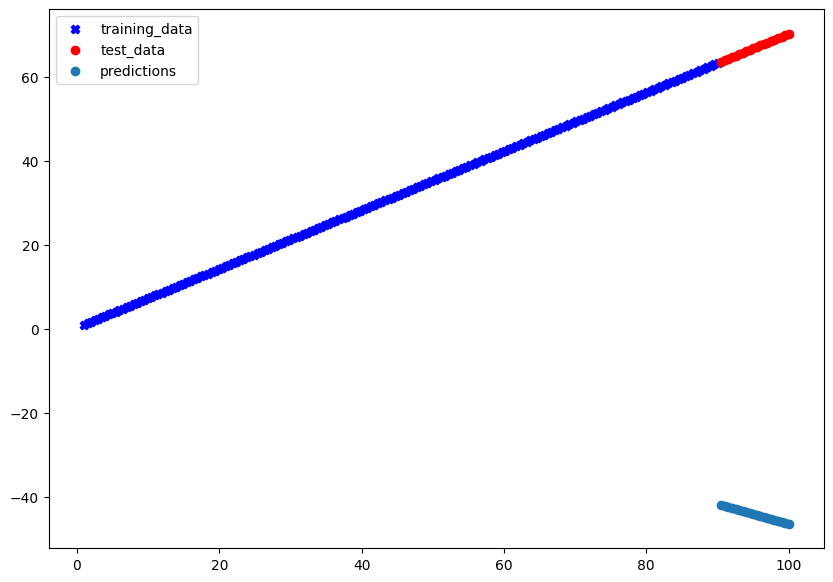

In [457]:
plot_data(predictions=y_pred1)

In [493]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer (SGD and Adam)
optimizer = torch.optim.Adam(params = model.parameters(),
                            lr =0.001) #lr--> leraning rate, very important hyperparameter

In [498]:
# Training loop
epochs = 1000
for epoch in range(epochs):
  model.train()
  #1. Fwd pass
  y_pred = model(X_train)

  #2. Calculate loss
  loss_train = loss_fn(y_pred,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Backward pass
  loss_train.backward()

  #5 Optimizer step
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    y_pred_test = model(X_test)

    loss_test = loss_fn(y_pred_test,y_test)

  if epoch % 10 == 0:
    print(f"epoch:{epoch} | loss_train: {loss_train} | loss_test: {loss_test}")


epoch:0 | loss_train: 34.65000915527344 | loss_test: 72.39954376220703
epoch:10 | loss_train: 34.18475341796875 | loss_test: 71.43679809570312
epoch:20 | loss_train: 33.719505310058594 | loss_test: 70.47406005859375
epoch:30 | loss_train: 33.25425338745117 | loss_test: 69.5113296508789
epoch:40 | loss_train: 32.78900146484375 | loss_test: 68.548583984375
epoch:50 | loss_train: 32.32374572753906 | loss_test: 67.58584594726562
epoch:60 | loss_train: 31.85849952697754 | loss_test: 66.62310791015625
epoch:70 | loss_train: 31.393245697021484 | loss_test: 65.66036224365234
epoch:80 | loss_train: 30.927997589111328 | loss_test: 64.69761657714844
epoch:90 | loss_train: 30.462743759155273 | loss_test: 63.734886169433594
epoch:100 | loss_train: 29.997493743896484 | loss_test: 62.77214813232422
epoch:110 | loss_train: 29.53223991394043 | loss_test: 61.80940628051758
epoch:120 | loss_train: 29.066986083984375 | loss_test: 60.84666061401367
epoch:130 | loss_train: 28.601736068725586 | loss_test: 59

In [499]:
with torch.inference_mode():
  y_pred_test_fnl = model(X_test)

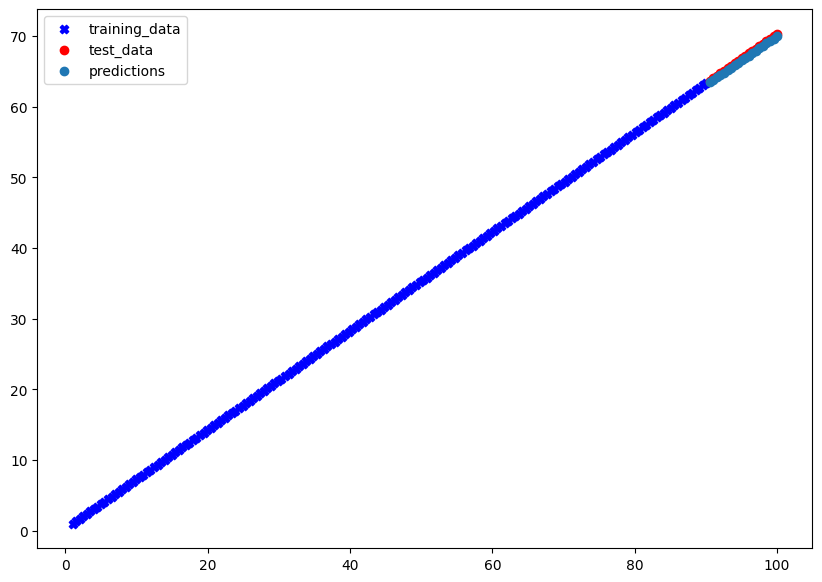

In [500]:
plot_data(predictions=y_pred_test_fnl)

In [461]:
import matplotlib.pyplot as plt
def plot_data(training_data =X_train,
              training_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=None):
  """
  Plots training data and labels in blue and test data and labels in red.
  """
  fig,ax = plt.subplots(figsize=(10,7))
  ax.scatter(training_data,training_labels,c='b',marker='X',label='training_data')
  ax.scatter(test_data,test_labels,c='r',label='test_data')
  if predictions is not None:
    ax.scatter(test_data,predictions,label='predictions')
  ax.legend()


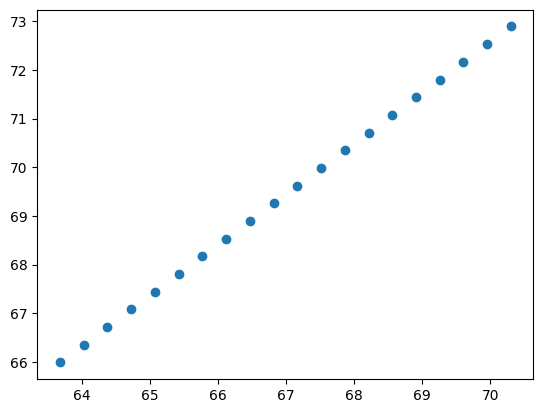

In [446]:
model.state_dict()

OrderedDict([('weights', tensor([0.7332])), ('bias', tensor([-0.1329]))])